# How Far Can Damian Lillard Take the Milwaukee Bucks? - 2023-2024 NBA Season Simulation

In this project, Monte Carlo Simulations as used to forecast the season outlook for the Milwaukee Bucks and predict the NBA Champion as of December 14, 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from scipy.stats import norm, skew
from scipy import stats
import statistics

In [2]:
def DatasetSlicer(Team, dataset):
    Team_masterdf=dataset[(dataset["Away Team"]==Team) | (dataset["Home Team"]==Team)].iloc[:,2:6]
    
    Team_df=pd.DataFrame(columns=["Team", "Opponent", "Team Points", "Opponent Points"])
    for game in range(len(Team_masterdf)):
        if Team in Team_masterdf.iloc[game,0]:
            Team_df.at[game,"Team"]=Team
            Team_df.at[game, "Opponent"]=Team_masterdf.iloc[game,2]
            Team_df.at[game, "Team Points"]=int(Team_masterdf.iloc[game,1])
            Team_df.at[game, "Opponent Points"]=int(Team_masterdf.iloc[game,3])
        elif Team in Team_masterdf.iloc[game,2]:
            Team_df.at[game,"Team"]=Team
            Team_df.at[game, "Opponent"]=Team_masterdf.iloc[game,0]
            Team_df.at[game, "Team Points"]=int(Team_masterdf.iloc[game,3])
            Team_df.at[game, "Opponent Points"]=int(Team_masterdf.iloc[game,1])
    
    return Team_df

In [3]:
def DatasetTransformer(Team1_df, Team2_df):
    Team1_df_TeamPoints=Team1_df["Team Points"].astype(int) 
    Team1_df_OppPoints=Team1_df["Opponent Points"].astype(int) 
    Team2_df_TeamPoints=Team2_df["Team Points"].astype(int) 
    Team2_df_OppPoints=Team2_df["Opponent Points"].astype(int) 
    
    global datasets
    global transformation
    
    datasets=[Team1_df_TeamPoints, Team1_df_OppPoints, Team2_df_TeamPoints, Team2_df_OppPoints]
    names=["Team 1 Team Points", "Team 1 Opponent Points", "Team 2 Team Points", "Team 2 Opponent Points"]
    transformation_dict={0:"log_team_t1_",1:"log_opp_t1_",2:"log_team_t2_",3:"log_opp_t2_"}
    transformation=""
    for ind, dataset in enumerate(datasets):
        nd=shapiro_test(dataset, names[ind])
        if nd==False:
           # print(f"In game {season_game_number}, {names[ind]} is not normally distributed")
            dataset=np.log(dataset)
            datasets[ind]=dataset
            transformation=transformation+transformation_dict[ind]
        
    #if transformation!="":
       # print(transformation)
    return datasets, transformation
                

In [4]:
def gameSim(datasets, transformation):
    global Team1_score
    global Team2_score
    
    Team1_mean_points_for=round(datasets[0].mean(),2)
    Team1_std_points_for=round(datasets[0].std(),2)

    Team1_mean_points_against=round(datasets[1].mean(),2)
    Team1_std_points_against=round(datasets[1].std(),2)
    
    Team2_mean_points_for=round(datasets[2].mean(),2)
    Team2_std_points_for=round(datasets[2].std(),2)

    Team2_mean_points_against=round(datasets[3].mean(),2)
    Team2_std_points_against=round(datasets[3].std(),2)
    
    if transformation=="log_team_t1_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t1_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="log_team_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2

    elif transformation=="log_team_t1_log_opp_t2_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t1_log_team_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="log_team_t1_log_team_t2_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
   
    elif transformation=="log_opp_t1_log_opp_t2_":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="log_team_t1_log_opp_t1_log_team_t2_log_opp_t2_":
        Team1_score= (np.exp(rnd.gauss(Team1_mean_points_for,Team1_std_points_for))+np.exp(rnd.gauss(Team2_mean_points_against,Team2_std_points_against)))/2
        Team2_score = (np.exp(rnd.gauss(Team2_mean_points_for,Team2_std_points_for))+np.exp(rnd.gauss(Team1_mean_points_against,Team1_std_points_against)))/2
   
    elif transformation=="":
        Team1_score= (rnd.gauss(Team1_mean_points_for,Team1_std_points_for)+rnd.gauss(Team2_mean_points_against,Team2_std_points_against))/2
        Team2_score = (rnd.gauss(Team2_mean_points_for,Team2_std_points_for)+rnd.gauss(Team1_mean_points_against,Team1_std_points_against))/2
                      
    if int((Team1_score)) > int((Team2_score)):
        return 1
    elif int((Team1_score)) < int((Team2_score)):
        return -1
    else: 
        return 0

In [5]:
def SeriesSim(Team1, Team2, series,data):
    Team1_df=DatasetSlicer(Team1, data)
    Team2_df=DatasetSlicer(Team2,data)
    
    DatasetTransformer(Team1_df, Team2_df)
    
    Team1_game_scores = []
    Team2_game_scores = []
    for i in range(series):
        game=gameSim(datasets, transformation)
        Team1_game_scores.append(Team1_score)
        Team2_game_scores.append(Team2_score)
        
    global ave_Team1_game_scores
    global ave_Team2_game_scores
    ave_Team1_game_scores=round(sum(Team1_game_scores)/len(Team1_game_scores))
    ave_Team2_game_scores=round(sum(Team2_game_scores)/len(Team2_game_scores))

    return Team1, ave_Team1_game_scores, Team2, ave_Team2_game_scores

In [6]:
def shapiro_test(df, name=""):
    stat, p = stats.normaltest(df)
    alpha = 0.05
    
    if p > alpha:
        #print(f"{name} looks normally distributed (fail to reject H0)")
        return True
    else:
        #print(f"{name} does not look normally distributed (reject H0)")
        return False

In [7]:
def PlayoffSeriesSim(Team1, Team2, series):
    Team1_df=DatasetSlicer(Team1, full_nba_season_results)
    Team2_df=DatasetSlicer(Team2, full_nba_season_results)
    
    DatasetTransformer(Team1_df, Team2_df)
    Team1_series_wins=0
    Team2_series_wins=0
    Team1_series_score=[]
    Team2_series_score=[]
    Team1_game_scores = []
    Team2_game_scores = []
    for i in range(series):
        Team1_wins = 0
        Team2_wins = 0
        while (Team1_wins!=4) and (Team2_wins!=4):
            gm = gameSim(datasets, transformation)
            Team1_game_scores.append(Team1_score)
            Team2_game_scores.append(Team2_score)
            if gm == 1:
                Team1_wins +=1 
            elif gm==-1:
                Team2_wins +=1
            
        if Team1_wins==4:
            Team1_series_wins+=1
            Team1_series_score.append(Team1_wins)
            Team2_series_score.append(Team2_wins)
        elif Team2_wins==4: 
            Team2_series_wins+=1
            Team1_series_score.append(Team1_wins)
            Team2_series_score.append(Team2_wins)
            
    print(f'{Team1} wins', round((Team1_series_wins/(1000)*100),2),'% of best-of-7 series')
    print(f'{Team2} wins', round((Team2_series_wins/(1000)*100),2),'% of best-of-7 series\n')
    
    if Team1_series_wins>Team2_series_wins:
        print("The average series score is 4 to", round(sum(Team2_series_score)/len(Team2_series_score)),"\n")
    else:
        print("The average series score is 4 to", round(sum(Team1_series_score)/len(Team1_series_score)),"\n")

    print(f'{Team1} Average Score ', round(sum(Team1_game_scores)/len(Team1_game_scores)))
    print(f'{Team2} Average Score ', round(sum(Team2_game_scores)/len(Team2_game_scores)))

# Bucks' Playoff Simulation with Doc Rivers

In [8]:
#Load full season results
full_nba_season_results=pd.read_csv("C:/Users/rprat/OneDrive/Documents/Youtube/How Far Can Damian Lillard Take The Bucks/Project Data/2023-2024 NBA Schedule - Games All Played.csv")

### Eastern Conference First Round

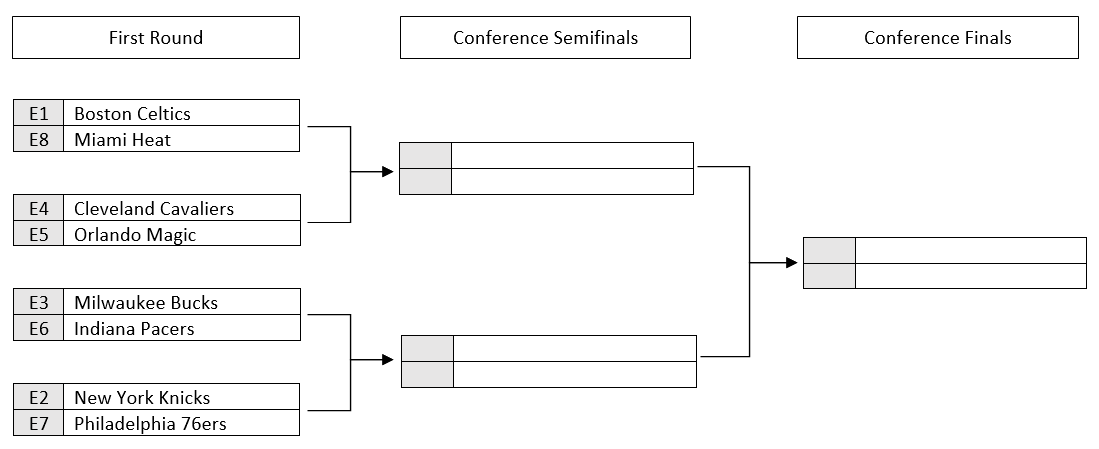

In [9]:
PlayoffSeriesSim("Boston Celtics", "Miami Heat", 1000)

Boston Celtics wins 82.9 % of best-of-7 series
Miami Heat wins 17.1 % of best-of-7 series

The average series score is 4 to 2 

Boston Celtics Average Score  115
Miami Heat Average Score  110


In [10]:
PlayoffSeriesSim("Cleveland Cavaliers", "Orlando Magic", 1000)

Cleveland Cavaliers wins 52.2 % of best-of-7 series
Orlando Magic wins 47.8 % of best-of-7 series

The average series score is 4 to 3 

Cleveland Cavaliers Average Score  111
Orlando Magic Average Score  110


In [11]:
PlayoffSeriesSim("Milwaukee Bucks", "Indiana Pacers", 1000)

Milwaukee Bucks wins 49.1 % of best-of-7 series
Indiana Pacers wins 50.9 % of best-of-7 series

The average series score is 4 to 3 

Milwaukee Bucks Average Score  119
Indiana Pacers Average Score  120


In [12]:
PlayoffSeriesSim("New York Knicks", "Philadelphia 76ers", 1000)

New York Knicks wins 53.7 % of best-of-7 series
Philadelphia 76ers wins 46.3 % of best-of-7 series

The average series score is 4 to 3 

New York Knicks Average Score  112
Philadelphia 76ers Average Score  111


The Milwaukee Bucks are eliminated in the first round of the playoffs

### Eastern Conference Semifinals

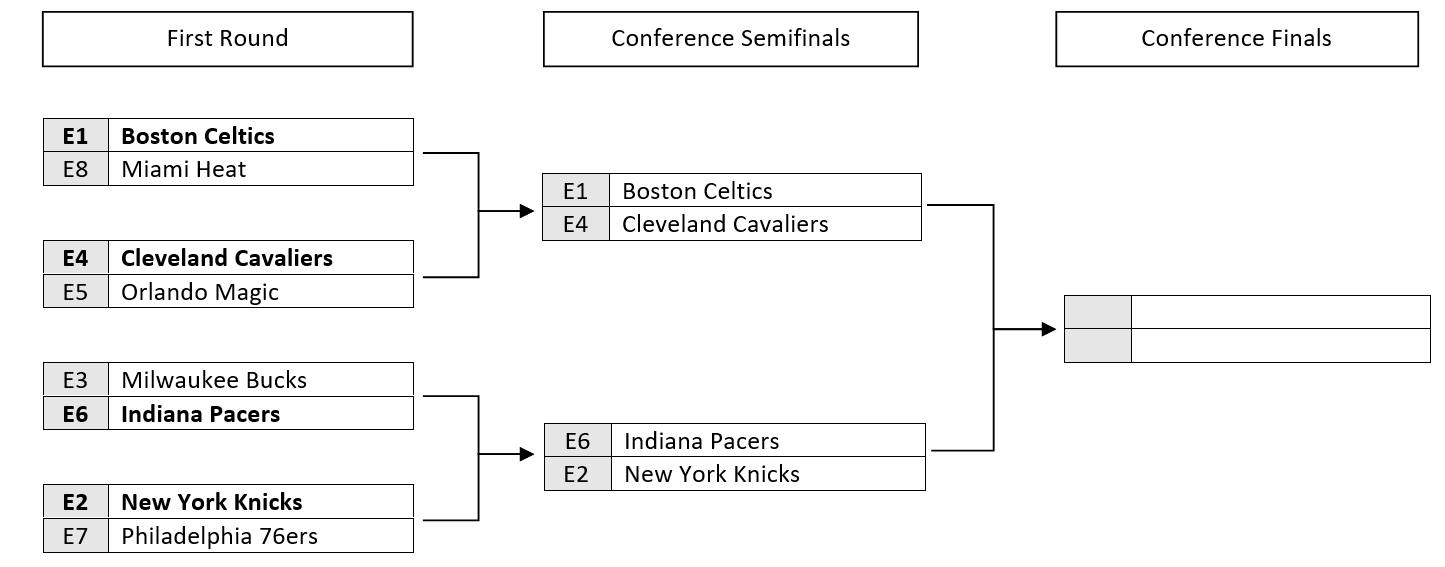

In [13]:
PlayoffSeriesSim("Boston Celtics", "Cleveland Cavaliers", 1000)

Boston Celtics wins 80.3 % of best-of-7 series
Cleveland Cavaliers wins 19.7 % of best-of-7 series

The average series score is 4 to 2 

Boston Celtics Average Score  116
Cleveland Cavaliers Average Score  111


In [14]:
PlayoffSeriesSim("New York Knicks", "Indiana Pacers", 1000)

New York Knicks wins 51.9 % of best-of-7 series
Indiana Pacers wins 48.1 % of best-of-7 series

The average series score is 4 to 3 

New York Knicks Average Score  116
Indiana Pacers Average Score  116


### Eastern Conference Finals

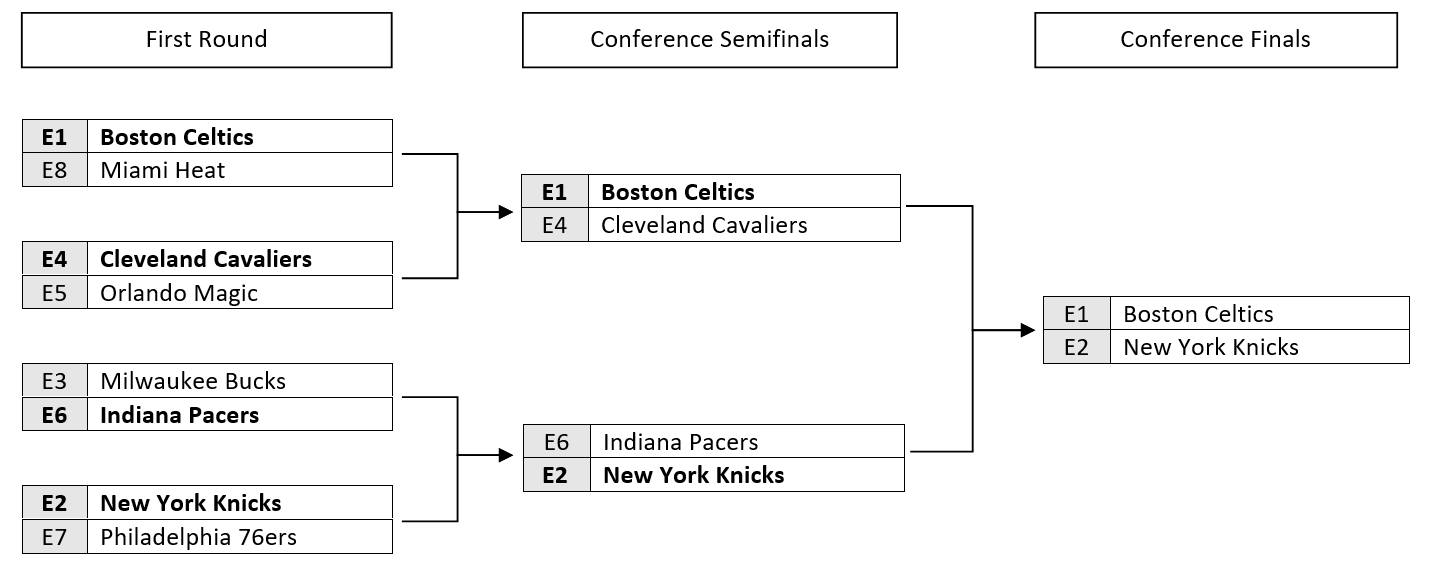

In [15]:
PlayoffSeriesSim("Boston Celtics", "New York Knicks", 1000)

Boston Celtics wins 74.1 % of best-of-7 series
New York Knicks wins 25.9 % of best-of-7 series

The average series score is 4 to 2 

Boston Celtics Average Score  114
New York Knicks Average Score  111


### Western Conference First Round

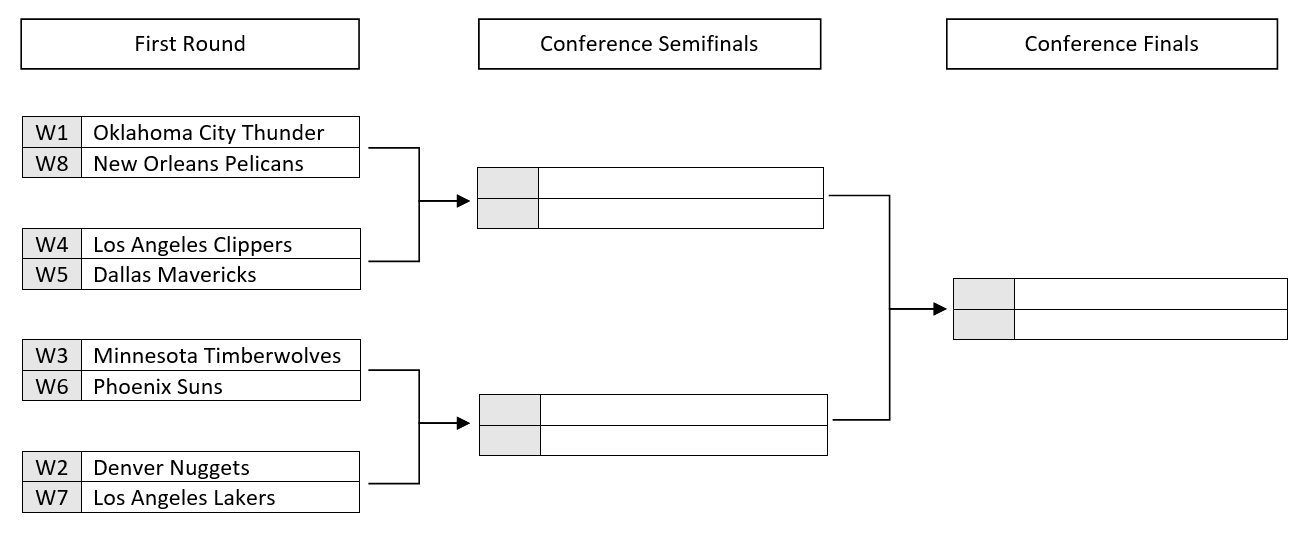

In [16]:
PlayoffSeriesSim("Oklahoma City Thunder", "New Orleans Pelicans", 1000)

Oklahoma City Thunder wins 59.4 % of best-of-7 series
New Orleans Pelicans wins 40.6 % of best-of-7 series

The average series score is 4 to 3 

Oklahoma City Thunder Average Score  115
New Orleans Pelicans Average Score  114


In [17]:
PlayoffSeriesSim("Los Angeles Clippers", "Dallas Mavericks", 1000)

Los Angeles Clippers wins 53.6 % of best-of-7 series
Dallas Mavericks wins 46.4 % of best-of-7 series

The average series score is 4 to 3 

Los Angeles Clippers Average Score  116
Dallas Mavericks Average Score  115


In [18]:
PlayoffSeriesSim("Minnesota Timberwolves", "Phoenix Suns", 1000)

Minnesota Timberwolves wins 65.1 % of best-of-7 series
Phoenix Suns wins 34.9 % of best-of-7 series

The average series score is 4 to 2 

Minnesota Timberwolves Average Score  113
Phoenix Suns Average Score  111


In [19]:
PlayoffSeriesSim("Denver Nuggets", "Los Angeles Lakers", 1000)

Denver Nuggets wins 66.0 % of best-of-7 series
Los Angeles Lakers wins 34.0 % of best-of-7 series

The average series score is 4 to 2 

Denver Nuggets Average Score  116
Los Angeles Lakers Average Score  114


### Western Conference Semifinals

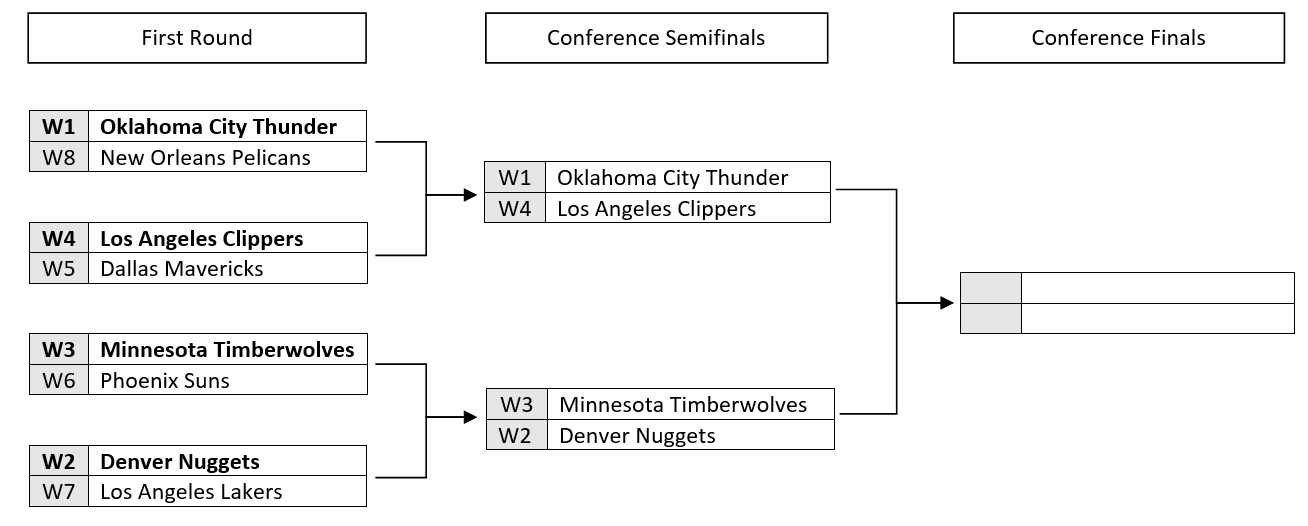

In [20]:
PlayoffSeriesSim("Oklahoma City Thunder", "Los Angeles Clippers", 1000)

Oklahoma City Thunder wins 61.4 % of best-of-7 series
Los Angeles Clippers wins 38.6 % of best-of-7 series

The average series score is 4 to 3 

Oklahoma City Thunder Average Score  116
Los Angeles Clippers Average Score  114


In [21]:
PlayoffSeriesSim("Minnesota Timberwolves", "Denver Nuggets", 1000)

Minnesota Timberwolves wins 55.7 % of best-of-7 series
Denver Nuggets wins 44.3 % of best-of-7 series

The average series score is 4 to 3 

Minnesota Timberwolves Average Score  111
Denver Nuggets Average Score  111


### Western Conference Finals

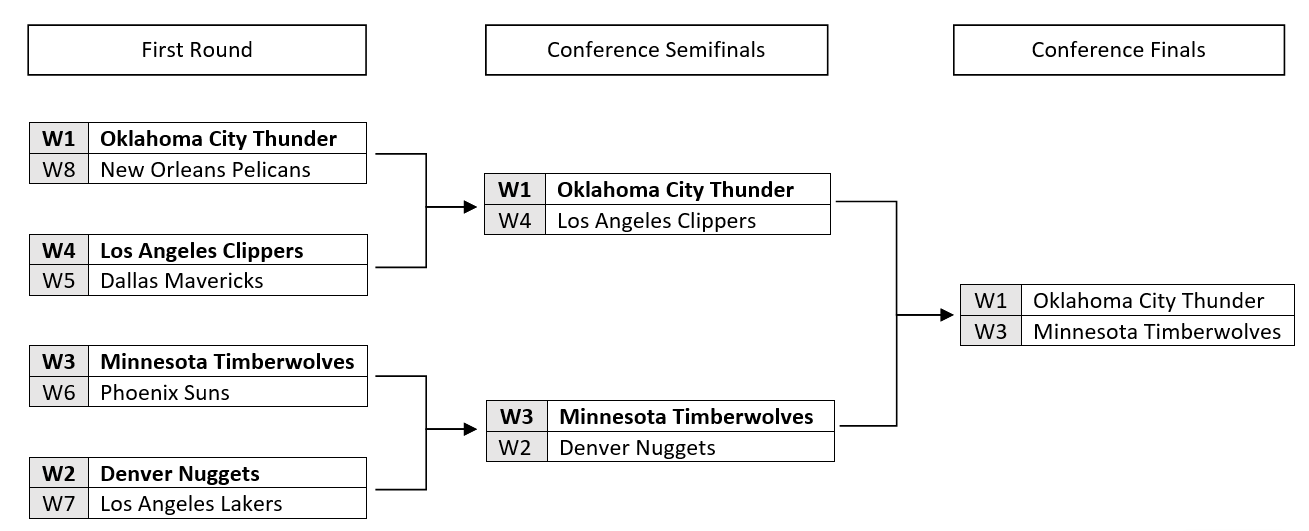

In [22]:
PlayoffSeriesSim("Oklahoma City Thunder", "Minnesota Timberwolves", 1000)

Oklahoma City Thunder wins 53.8 % of best-of-7 series
Minnesota Timberwolves wins 46.2 % of best-of-7 series

The average series score is 4 to 3 

Oklahoma City Thunder Average Score  113
Minnesota Timberwolves Average Score  113


### NBA Finals

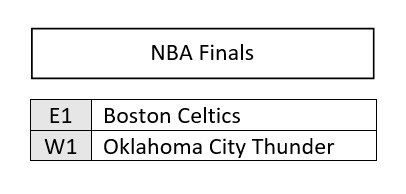

In [23]:
PlayoffSeriesSim("Boston Celtics","Oklahoma City Thunder", 1000)

Boston Celtics wins 66.1 % of best-of-7 series
Oklahoma City Thunder wins 33.9 % of best-of-7 series

The average series score is 4 to 2 

Boston Celtics Average Score  117
Oklahoma City Thunder Average Score  114


## The Boston Celtics win the 2023-2024 NBA title

# Bucks' Season Simulation before Adrian Griffin Departure

To see how far into the playoffs the Milwaukee Bucks would have gone without replacing Adrian Griffin, the rest of the NBA season from January 23, 2024 needs to be simulated to determine what the standing would have been

# Data Exploration

In [24]:
eastern_conference_teams=['Boston Celtics', 'Washington Wizards', 'Atlanta Hawks', 'Detroit Pistons',  
                          'Cleveland Cavaliers', 'Philadelphia 76ers',  'New York Knicks', 'Miami Heat', 
                          'Toronto Raptors', 'Brooklyn Nets', 'Orlando Magic','Chicago Bulls', 'Indiana Pacers',  
                          'Milwaukee Bucks', 'Charlotte Hornets']

western_conference_teams=['Los Angeles Lakers', 'Phoenix Suns', 'Houston Rockets', 'Minnesota Timberwolves', 
                          'New Orleans Pelicans', 'Oklahoma City Thunder', 'Sacramento Kings', 'Dallas Mavericks', 
                          'Portland Trail Blazers', 'Denver Nuggets','Los Angeles Clippers', 'Golden State Warriors', 
                          'Memphis Grizzlies','Utah Jazz', 'San Antonio Spurs']

In [25]:
master_game_list=pd.read_csv("C:/Users/rprat/OneDrive/Documents/Youtube/How Far Can Damian Lillard Take The Bucks/Project Data/2023-2024 NBA Schedule - Games All Played before Griffin.csv")

In [26]:
played_games=master_game_list.iloc[0:642,:].reset_index(drop=True)
unplayed_games=master_game_list.iloc[642:,:].reset_index(drop=True)

In [27]:
played_games

,Date,Start (ET),Away Team,Away PTS,Home Team,Home PTS,Arena,Notes
0,Tue Oct 24 2023,7:30p,Los Angeles Lakers,107.0,Denver Nuggets,119.0,Ball Arena,NaN
1,Tue Oct 24 2023,10:00p,Phoenix Suns,108.0,Golden State Warriors,104.0,Chase Center,NaN
2,Wed Oct 25 2023,7:00p,Houston Rockets,86.0,Orlando Magic,116.0,Kia Center,NaN
3,Wed Oct 25 2023,7:00p,Boston Celtics,108.0,New York Knicks,104.0,Madison Square Garden (IV),NaN
4,Wed Oct 25 2023,7:00p,Washington Wizards,120.0,Indiana Pacers,143.0,Gainbridge Fieldhouse,NaN
...,...,...,...,...,...,...,...,...
637,Mon Jan 22 2024,7:30p,Memphis Grizzlies,108.0,Toronto Raptors,100.0,Scotiabank Arena,NaN
638,Mon Jan 22 2024,8:00p,Charlotte Hornets,128.0,Minnesota Timberwolves,125.0,Target Center,NaN
639,Mon Jan 22 2024,8:30p,Boston Celtics,119.0,Dallas Mavericks,110.0,American Airlines Center,NaN
640,Mon Jan 22 2024,9:00p,Chicago Bulls,113.0,Phoenix Suns,115.0,Footprint Center,NaN


In [28]:
bucks_played_games=len(played_games[(played_games["Away Team"]=="Milwaukee Bucks")|(played_games["Home Team"]=="Milwaukee Bucks")])

played_games_per_team=[]
for i in list(played_games["Away Team"].unique()):
    team_played_games=len(played_games[(played_games["Away Team"]==i)|(played_games["Home Team"]==i)])
    played_games_per_team.append(team_played_games)

print(f"Each team has played roughly", round(sum(played_games_per_team)/len(played_games_per_team)),"games so far.")
print(f"The Milwaukee Bucks have played", bucks_played_games,"games so far.")
print(round((bucks_played_games/80)*100,2),"% of the NBA season completed.")

Each team has played roughly 43 games so far.
The Milwaukee Bucks have played 43 games so far.
53.75 % of the NBA season completed.


In [29]:
#Eastern Current Standings
eastern_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in eastern_conference_teams:
    team_win_count=0
    Team_df_played_season=DatasetSlicer(team, played_games)
    for i in range(len(Team_df_played_season)):
        if Team_df_played_season.iloc[i,2]>Team_df_played_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/len(Team_df_played_season)
    row=[team, team_win_count, len(Team_df_played_season)-team_win_count, win_percentage]
    eastern_conference_standings.loc[len(eastern_conference_standings)]=row
    
eastern_conference_standings=eastern_conference_standings.sort_values("%", ascending=False)
eastern_conference_standings.reset_index(drop=True)

,Team,W,L,%
0,Boston Celtics,34,10,0.772727
1,Milwaukee Bucks,30,13,0.697674
2,Philadelphia 76ers,29,13,0.690476
3,Cleveland Cavaliers,26,15,0.634146
4,New York Knicks,26,17,0.604651
5,Miami Heat,24,19,0.558140
6,Indiana Pacers,24,20,0.545455
7,Orlando Magic,23,21,0.522727
8,Chicago Bulls,21,24,0.466667
9,Atlanta Hawks,18,25,0.418605


In [30]:
#Western Current Standings
western_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in western_conference_teams:
    team_win_count=0
    Team_df_played_season=DatasetSlicer(team, played_games)
    for i in range(len(Team_df_played_season)):
        if Team_df_played_season.iloc[i,2]>Team_df_played_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/len(Team_df_played_season)
    row=[team, team_win_count, len(Team_df_played_season)-team_win_count, win_percentage]
    western_conference_standings.loc[len(western_conference_standings)]=row
    
western_conference_standings=western_conference_standings.sort_values("%", ascending=False)
western_conference_standings.reset_index(drop=True)

,Team,W,L,%
0,Minnesota Timberwolves,30,13,0.697674
1,Oklahoma City Thunder,29,13,0.690476
2,Denver Nuggets,30,14,0.681818
3,Los Angeles Clippers,27,14,0.658537
4,Phoenix Suns,25,18,0.581395
5,New Orleans Pelicans,25,18,0.581395
6,Sacramento Kings,24,18,0.571429
7,Dallas Mavericks,24,19,0.558140
8,Los Angeles Lakers,23,22,0.511111
9,Utah Jazz,22,22,0.500000


In [31]:
bucks_df=played_games[(played_games["Away Team"]=="Milwaukee Bucks")|(played_games["Home Team"]=="Milwaukee Bucks")]
bucks_df

,Date,Start (ET),Away Team,Away PTS,Home Team,Home PTS,Arena,Notes
14,Thu Oct 26 2023,7:30p,Philadelphia 76ers,117.0,Milwaukee Bucks,118.0,Fiserv Forum,NaN
36,Sun Oct 29 2023,7:00p,Atlanta Hawks,127.0,Milwaukee Bucks,110.0,Fiserv Forum,NaN
46,Mon Oct 30 2023,8:00p,Miami Heat,114.0,Milwaukee Bucks,122.0,Fiserv Forum,NaN
55,Wed Nov 1 2023,7:00p,Milwaukee Bucks,111.0,Toronto Raptors,130.0,Scotiabank Arena,NaN
72,Fri Nov 3 2023,7:30p,New York Knicks,105.0,Milwaukee Bucks,110.0,Fiserv Forum,In-Season Tournament
95,Mon Nov 6 2023,7:30p,Milwaukee Bucks,129.0,Brooklyn Nets,125.0,Barclays Center,NaN
111,Wed Nov 8 2023,8:00p,Detroit Pistons,118.0,Milwaukee Bucks,120.0,Fiserv Forum,NaN
117,Thu Nov 9 2023,7:00p,Milwaukee Bucks,124.0,Indiana Pacers,126.0,Gainbridge Fieldhouse,NaN
128,Sat Nov 11 2023,6:00p,Milwaukee Bucks,97.0,Orlando Magic,112.0,Kia Center,NaN
145,Mon Nov 13 2023,8:00p,Chicago Bulls,109.0,Milwaukee Bucks,118.0,Fiserv Forum,NaN


In [32]:
bucks_df=DatasetSlicer("Milwaukee Bucks", played_games)

In [33]:
bucks_df

,Team,Opponent,Team Points,Opponent Points
0,Milwaukee Bucks,Philadelphia 76ers,118,117
1,Milwaukee Bucks,Atlanta Hawks,110,127
2,Milwaukee Bucks,Miami Heat,122,114
3,Milwaukee Bucks,Toronto Raptors,111,130
4,Milwaukee Bucks,New York Knicks,110,105
5,Milwaukee Bucks,Brooklyn Nets,129,125
6,Milwaukee Bucks,Detroit Pistons,120,118
7,Milwaukee Bucks,Indiana Pacers,124,126
8,Milwaukee Bucks,Orlando Magic,97,112
9,Milwaukee Bucks,Chicago Bulls,118,109


In [34]:
MIL_df_TeamPoints=bucks_df.iloc[:,2].astype(int)
MIL_df_OppPoints=bucks_df.iloc[:,3].astype(int)

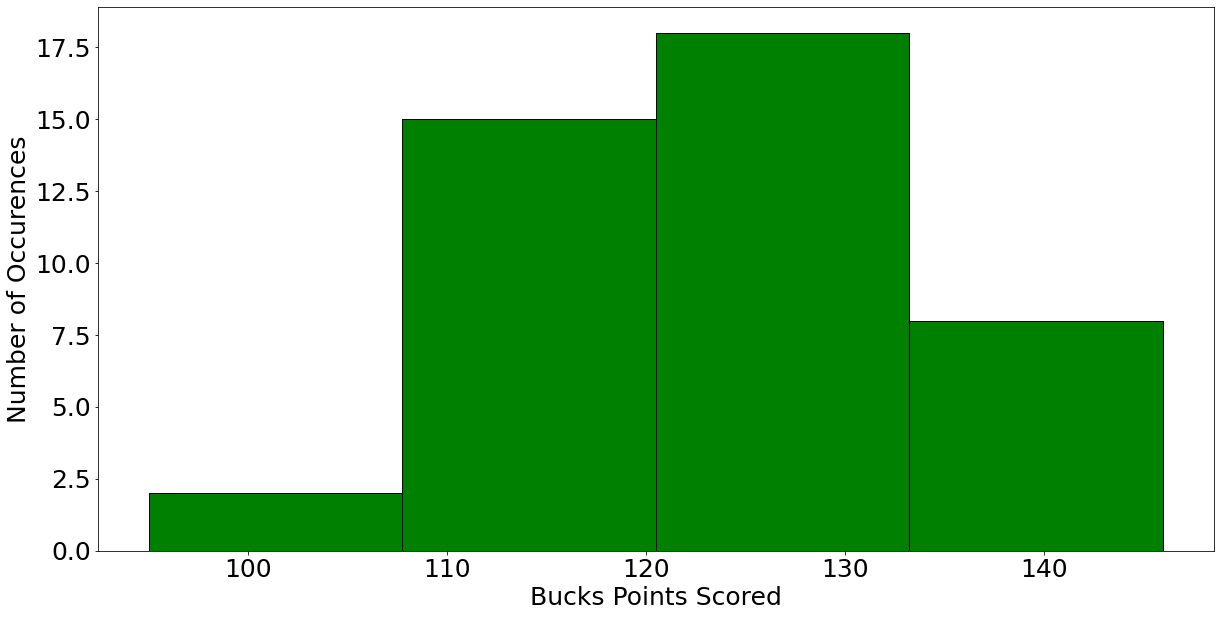

In [35]:
#Points Scored
plt.figure(figsize=(20,10))
MIL_df_TeamPoints.hist(color="green",bins=4,edgecolor="black")
#plt.axvline(np.mean(MIL_df_TeamPoints), color="red", linestyle="dashed", linewidth=3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Bucks Points Scored", fontsize=25)
plt.ylabel("Number of Occurences", fontsize=25)
plt.grid(False)

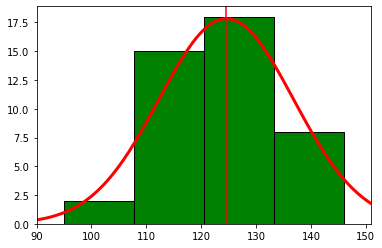

In [36]:
plt.figure(1)
result=plt.hist(MIL_df_TeamPoints, color="green",bins=4,edgecolor="black")
plt.xlim((min(MIL_df_TeamPoints)-5,max(MIL_df_TeamPoints)+5))

mean=np.mean(MIL_df_TeamPoints)
std=np.std(MIL_df_TeamPoints)
x=np.linspace(min(MIL_df_TeamPoints)-5,max(MIL_df_TeamPoints)+5,100)
dx = result[1][1] - result[1][0]
scale = len(MIL_df_TeamPoints)*dx
plt.plot(x, norm.pdf(x,mean,std)*scale, color="red", linewidth=3)
plt.axvline(np.mean(MIL_df_TeamPoints), color="red")
#plt.axvline(statistics.median(MIL_df_TeamPoints), color="blue")
#plt.axvline(statistics.mode(MIL_df_TeamPoints), color="yellow")


plt.show()

In [37]:
if shapiro_test(MIL_df_TeamPoints)==True:
    print("The data looks normally distributed (fail to reject H0)")
else:
    print("The data does not look normally distributed (reject H0)")
    
if skew(MIL_df_TeamPoints)==0:
    print("The skew is 0")
elif -0.5>skew(MIL_df_TeamPoints) or 0.5>skew(MIL_df_TeamPoints):
    print("The skew is",round(skew(MIL_df_TeamPoints),2),". The skew is negligible." )
else:
    print("The skew is",round(skew(MIL_df_TeamPoints),2),". The data is skewed")

The data looks normally distributed (fail to reject H0)
The skew is -0.24 . The skew is negligible.


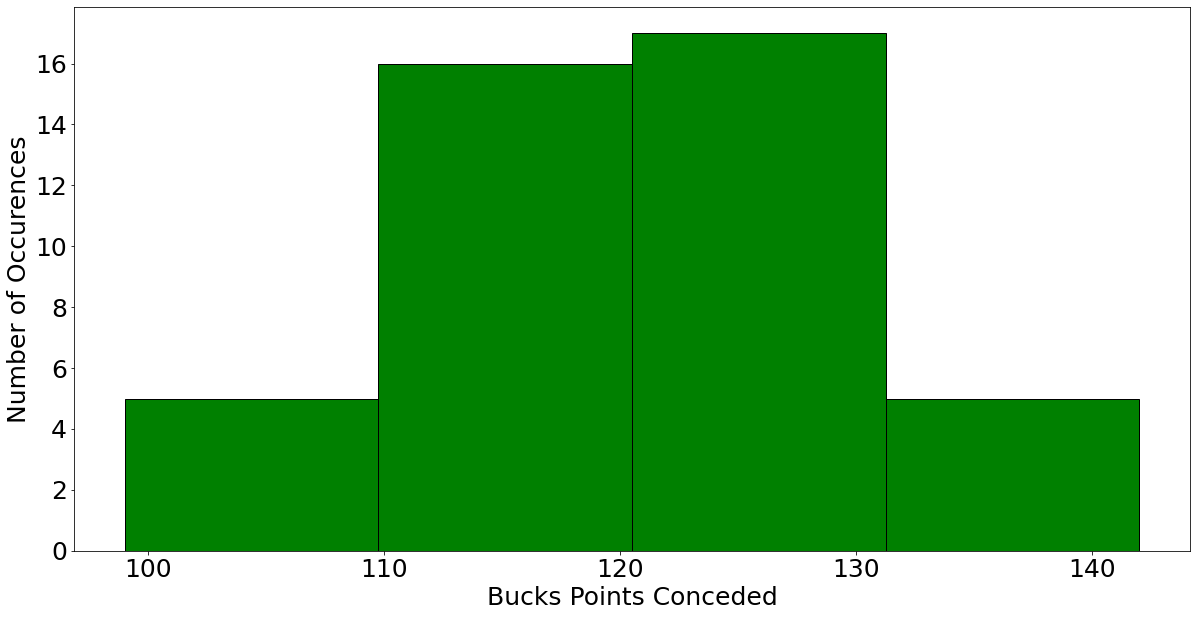

In [38]:
#Points Conceded
plt.figure(figsize=(20,10))
MIL_df_OppPoints.hist(color="green",bins=4,edgecolor="black")
#plt.axvline(np.mean(MIL_df_TeamPoints), color="red", linestyle="dashed", linewidth=3)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Bucks Points Conceded", fontsize=25)
plt.ylabel("Number of Occurences", fontsize=25)
plt.grid(False)

In [39]:
if shapiro_test(MIL_df_OppPoints)==True:
    print("The data looks normally distributed (fail to reject H0)")
else:
    print("The data does not look normally distributed (reject H0)")
    
if skew(MIL_df_OppPoints)==0:
    print("The skew is 0")
elif -0.5<skew(MIL_df_OppPoints) or 0.5>skew(MIL_df_OppPoints):
    print("The skew is",round(skew(MIL_df_OppPoints),2),". The skew is negligible." )
else:
    print("The skew is",round(skew(MIL_df_OppPoints),2),". The data is skewed")

The data looks normally distributed (fail to reject H0)
The skew is -0.01 . The skew is negligible.


# Regular Season Simulation

In [40]:
for i in range(len(unplayed_games)):
    SeriesSim(unplayed_games.iloc[i,2],unplayed_games.iloc[i,4], 1000,played_games)
    unplayed_games.iloc[i,3]=ave_Team1_game_scores
    unplayed_games.iloc[i,5]=ave_Team2_game_scores

In [41]:
full_nba_season_results=pd.concat([played_games, unplayed_games], ignore_index=True)

In [42]:
full_nba_season_results

,Date,Start (ET),Away Team,Away PTS,Home Team,Home PTS,Arena,Notes
0,Tue Oct 24 2023,7:30p,Los Angeles Lakers,107.0,Denver Nuggets,119.0,Ball Arena,NaN
1,Tue Oct 24 2023,10:00p,Phoenix Suns,108.0,Golden State Warriors,104.0,Chase Center,NaN
2,Wed Oct 25 2023,7:00p,Houston Rockets,86.0,Orlando Magic,116.0,Kia Center,NaN
3,Wed Oct 25 2023,7:00p,Boston Celtics,108.0,New York Knicks,104.0,Madison Square Garden (IV),NaN
4,Wed Oct 25 2023,7:00p,Washington Wizards,120.0,Indiana Pacers,143.0,Gainbridge Fieldhouse,NaN
...,...,...,...,...,...,...,...,...
1226,Sun Apr 14 2024,3:30p,Phoenix Suns,111.0,Minnesota Timberwolves,114.0,Target Center,NaN
1227,Sun Apr 14 2024,3:30p,Los Angeles Lakers,114.0,New Orleans Pelicans,116.0,Smoothie King Center,NaN
1228,Sun Apr 14 2024,3:30p,Dallas Mavericks,116.0,Oklahoma City Thunder,120.0,Paycom Center,NaN
1229,Sun Apr 14 2024,3:30p,Portland Trail Blazers,113.0,Sacramento Kings,117.0,Golden 1 Center,NaN


In [43]:
eastern_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in eastern_conference_teams:
    team_win_count=0
    Team_df_full_season=DatasetSlicer(team, full_nba_season_results)
    for i in range(len(Team_df_full_season)):
        if Team_df_full_season.iloc[i,2]>Team_df_full_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/80
    row=[team, team_win_count, 80-team_win_count, win_percentage]
    eastern_conference_standings.loc[len(eastern_conference_standings)]=row

In [44]:
eastern_conference_standings=eastern_conference_standings.sort_values("%", ascending=False)
eastern_conference_standings.reset_index(drop=True)
eastern_conference_standings.index=np.arange(1, len(eastern_conference_standings)+1)
eastern_conference_standings

,Team,W,L,%
1,Boston Celtics,72,8,0.9000
2,Philadelphia 76ers,68,12,0.8500
3,New York Knicks,57,23,0.7125
4,Cleveland Cavaliers,55,25,0.6875
5,Milwaukee Bucks,51,29,0.6375
6,Indiana Pacers,45,35,0.5625
7,Orlando Magic,42,38,0.5250
8,Miami Heat,39,41,0.4875
9,Chicago Bulls,31,49,0.3875
10,Brooklyn Nets,27,53,0.3375


In [45]:
western_conference_standings=pd.DataFrame(columns=["Team","W","L","%"])
for team in western_conference_teams:
    team_win_count=0
    Team_df_full_season=DatasetSlicer(team, full_nba_season_results)
    for i in range(len(Team_df_full_season)):
        if Team_df_full_season.iloc[i,2]>Team_df_full_season.iloc[i,3]:
            team_win_count+=1
    win_percentage=team_win_count/80
    row=[team, team_win_count, 80-team_win_count, win_percentage]
    western_conference_standings.loc[len(western_conference_standings)]=row

In [46]:
western_conference_standings=western_conference_standings.sort_values("%", ascending=False)
western_conference_standings.reset_index(drop=True)
western_conference_standings.index=np.arange(1, len(eastern_conference_standings)+1)
western_conference_standings

,Team,W,L,%
1,Oklahoma City Thunder,65,15,0.8125
2,Minnesota Timberwolves,61,19,0.7625
3,Los Angeles Clippers,59,21,0.7375
4,Denver Nuggets,58,22,0.7250
5,New Orleans Pelicans,55,25,0.6875
6,Phoenix Suns,44,36,0.5500
7,Dallas Mavericks,42,38,0.5250
8,Los Angeles Lakers,39,41,0.4875
9,Houston Rockets,39,41,0.4875
10,Sacramento Kings,37,43,0.4625


## Play-in Tournament Simulation

### Eastern Conference Play-in 

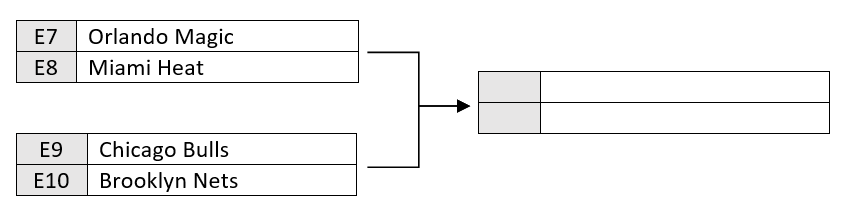

In [47]:
SeriesSim("Orlando Magic", "Miami Heat", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Miami Heat beat the Orlando Magic")
else:
    print("The Orlando Magic beat the Miami Heat")

The Miami Heat beat the Orlando Magic


In [48]:
SeriesSim("Chicago Bulls", "Brooklyn Nets", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Brooklyn Nets beat the Chicago Bulls")
else:
    print("The Chicago Bulls beat the Brooklyn Nets")

The Brooklyn Nets beat the Chicago Bulls


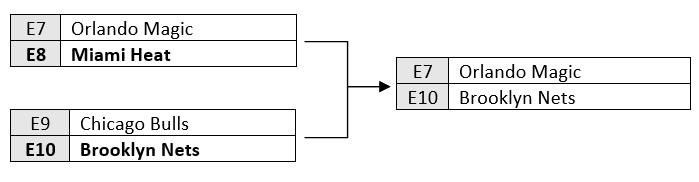

In [49]:
SeriesSim("Orlando Magic", "Brooklyn Nets", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Brooklyn Nets beat the Orlando Magic")
else:
    print("The Orlando Magic beat the Brooklyn Nets")

The Brooklyn Nets beat the Orlando Magic


The Miami Heat and the Brooklyn Nets advance to the playoffs

### Western Conference Play-in

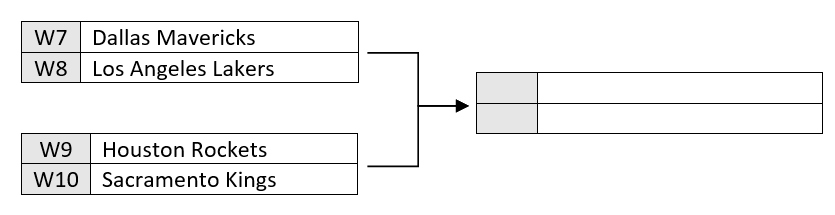

In [50]:
SeriesSim("Dallas Mavericks", "Los Angeles Lakers", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Los Angeles Lakers beat the  Dallas Mavericks")
else:
    print("The Dallas Mavericks beat the Los Angeles Lakers")

The Los Angeles Lakers beat the  Dallas Mavericks


In [51]:
SeriesSim("Houston Rockets","Sacramento Kings", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Sacramento Kings beat the Houston Rockets")
else:
    print("The Houston Rockets beat the Sacramento Kings")

The Houston Rockets beat the Sacramento Kings


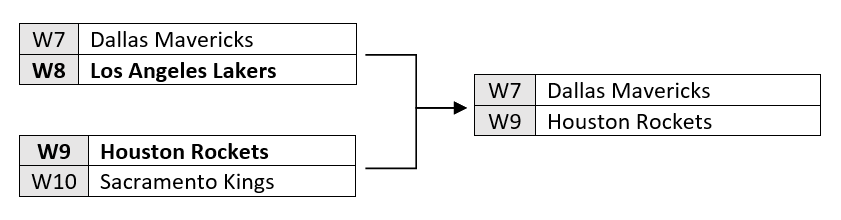

In [52]:
SeriesSim("Dallas Mavericks", "Houston Rockets", 1000,full_nba_season_results)
if ave_Team2_game_scores>ave_Team1_game_scores:
    print("The Houston Rockets beat the Dallas Mavericks")
else:
    print("The Dallas Mavericks beat the Houston Rockets")

The Houston Rockets beat the Dallas Mavericks


The Houston Rockets and the Los Angeles Lakers advance to the playoffs

## Playoff Simulation

### Eastern Conference First Round 

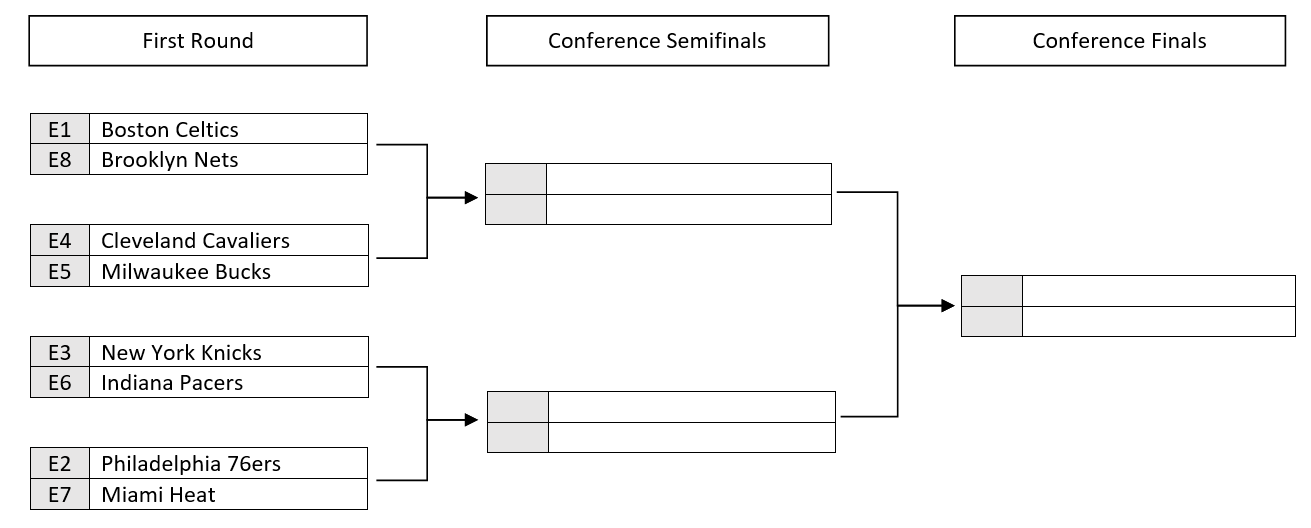

In [53]:
PlayoffSeriesSim("Boston Celtics", "Brooklyn Nets", 1000)

Boston Celtics wins 0.0 % of best-of-7 series
Brooklyn Nets wins 100.0 % of best-of-7 series

The average series score is 4 to 0 

Boston Celtics Average Score  118
Brooklyn Nets Average Score  125


In [54]:
PlayoffSeriesSim("Cleveland Cavaliers", "Milwaukee Bucks", 1000)

Cleveland Cavaliers wins 0.0 % of best-of-7 series
Milwaukee Bucks wins 100.0 % of best-of-7 series

The average series score is 4 to 0 

Cleveland Cavaliers Average Score  118
Milwaukee Bucks Average Score  125


In [55]:
PlayoffSeriesSim("New York Knicks", "Indiana Pacers", 1000)

New York Knicks wins 60.1 % of best-of-7 series
Indiana Pacers wins 39.9 % of best-of-7 series

The average series score is 4 to 3 

New York Knicks Average Score  118
Indiana Pacers Average Score  117


In [56]:
PlayoffSeriesSim("Philadelphia 76ers", "Miami Heat", 1000)

Philadelphia 76ers wins 78.8 % of best-of-7 series
Miami Heat wins 21.2 % of best-of-7 series

The average series score is 4 to 2 

Philadelphia 76ers Average Score  115
Miami Heat Average Score  112


### Eastern Conference Semi-finals

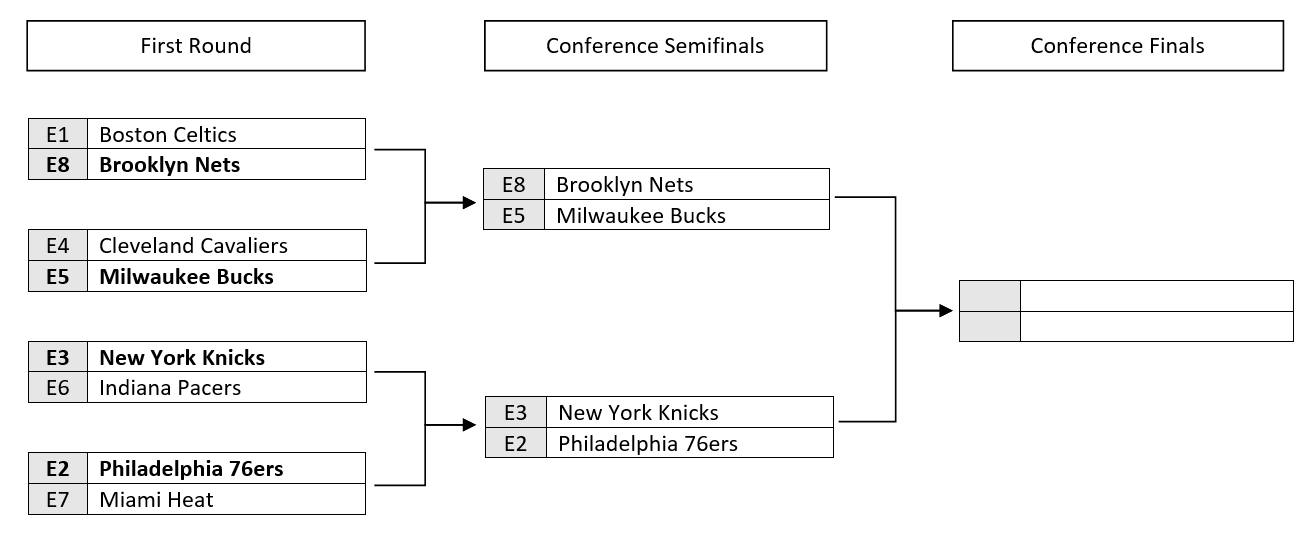

In [57]:
PlayoffSeriesSim("Brooklyn Nets","Milwaukee Bucks", 1000)

Brooklyn Nets wins 28.5 % of best-of-7 series
Milwaukee Bucks wins 71.5 % of best-of-7 series

The average series score is 4 to 2 

Brooklyn Nets Average Score  117
Milwaukee Bucks Average Score  119


In [58]:
PlayoffSeriesSim("New York Knicks", "Philadelphia 76ers", 1000)

New York Knicks wins 39.7 % of best-of-7 series
Philadelphia 76ers wins 60.3 % of best-of-7 series

The average series score is 4 to 3 

New York Knicks Average Score  114
Philadelphia 76ers Average Score  115


### Eastern Conference Finals

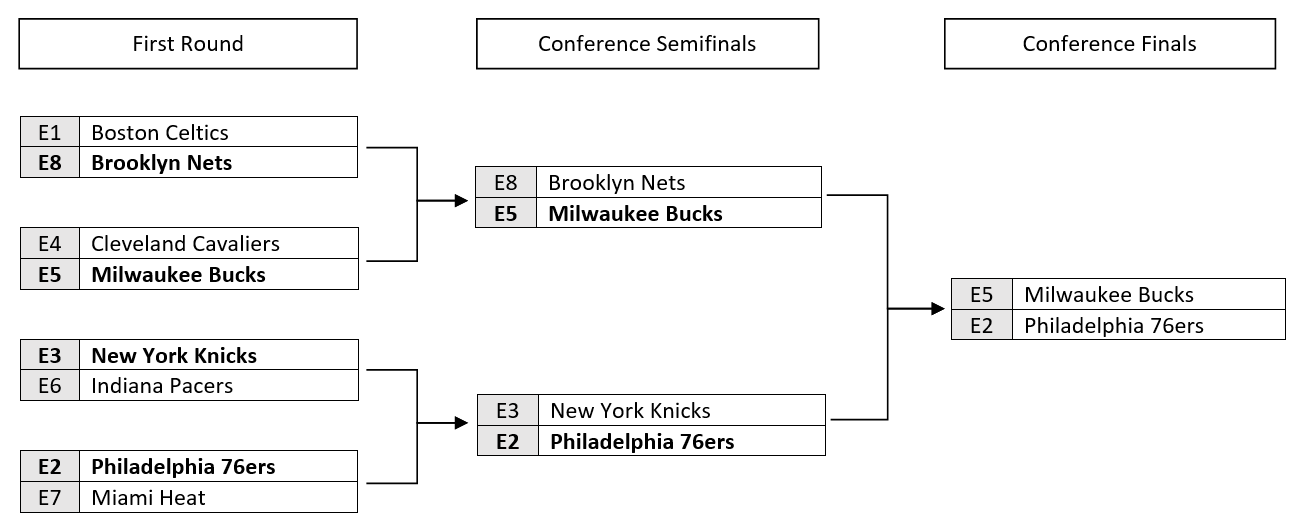

In [59]:
PlayoffSeriesSim("Milwaukee Bucks","Philadelphia 76ers", 1000)

Milwaukee Bucks wins 33.3 % of best-of-7 series
Philadelphia 76ers wins 66.7 % of best-of-7 series

The average series score is 4 to 2 

Milwaukee Bucks Average Score  117
Philadelphia 76ers Average Score  119


The Milwaukee Bucks are eliminated in the Eastern Conference Finals

### Western Conference First Round

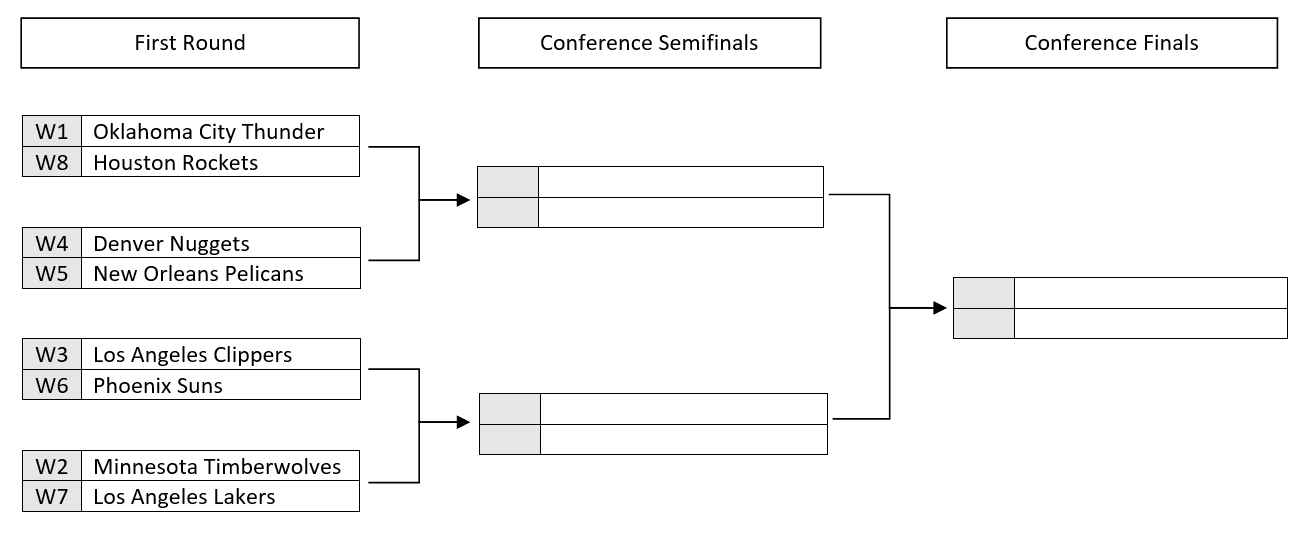

In [60]:
PlayoffSeriesSim("Oklahoma City Thunder", "Houston Rockets", 1000)

Oklahoma City Thunder wins 73.9 % of best-of-7 series
Houston Rockets wins 26.1 % of best-of-7 series

The average series score is 4 to 2 

Oklahoma City Thunder Average Score  117
Houston Rockets Average Score  114


In [61]:
PlayoffSeriesSim("Denver Nuggets", "New Orleans Pelicans", 1000)

Denver Nuggets wins 100.0 % of best-of-7 series
New Orleans Pelicans wins 0.0 % of best-of-7 series

The average series score is 4 to 0 

Denver Nuggets Average Score  128
New Orleans Pelicans Average Score  115


In [62]:
PlayoffSeriesSim("Los Angeles Clippers", "Phoenix Suns", 1000)

Los Angeles Clippers wins 69.3 % of best-of-7 series
Phoenix Suns wins 30.7 % of best-of-7 series

The average series score is 4 to 2 

Los Angeles Clippers Average Score  116
Phoenix Suns Average Score  114


In [63]:
PlayoffSeriesSim("Minnesota Timberwolves", "Los Angeles Lakers", 1000)

Minnesota Timberwolves wins 76.4 % of best-of-7 series
Los Angeles Lakers wins 23.6 % of best-of-7 series

The average series score is 4 to 2 

Minnesota Timberwolves Average Score  115
Los Angeles Lakers Average Score  112


### Western Conference Semi-finals

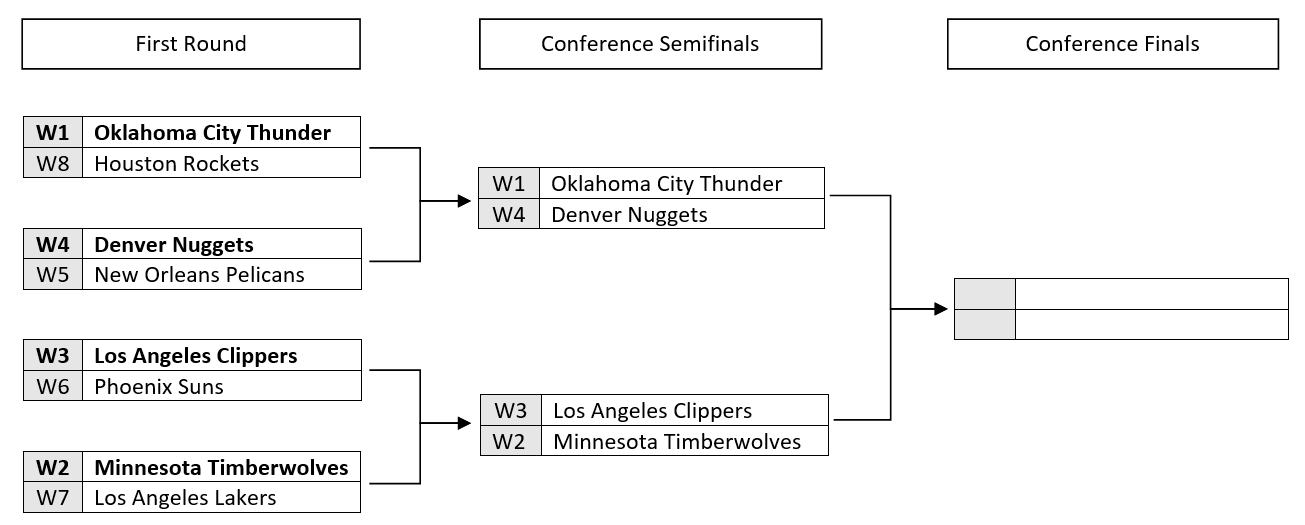

In [64]:
PlayoffSeriesSim("Oklahoma City Thunder", "Denver Nuggets", 1000)

Oklahoma City Thunder wins 62.4 % of best-of-7 series
Denver Nuggets wins 37.6 % of best-of-7 series

The average series score is 4 to 3 

Oklahoma City Thunder Average Score  116
Denver Nuggets Average Score  115


In [65]:
PlayoffSeriesSim("Los Angeles Clippers", "Minnesota Timberwolves", 1000)

Los Angeles Clippers wins 100.0 % of best-of-7 series
Minnesota Timberwolves wins 0.0 % of best-of-7 series

The average series score is 4 to 0 

Los Angeles Clippers Average Score  114
Minnesota Timberwolves Average Score  104


### Western Conference Finals

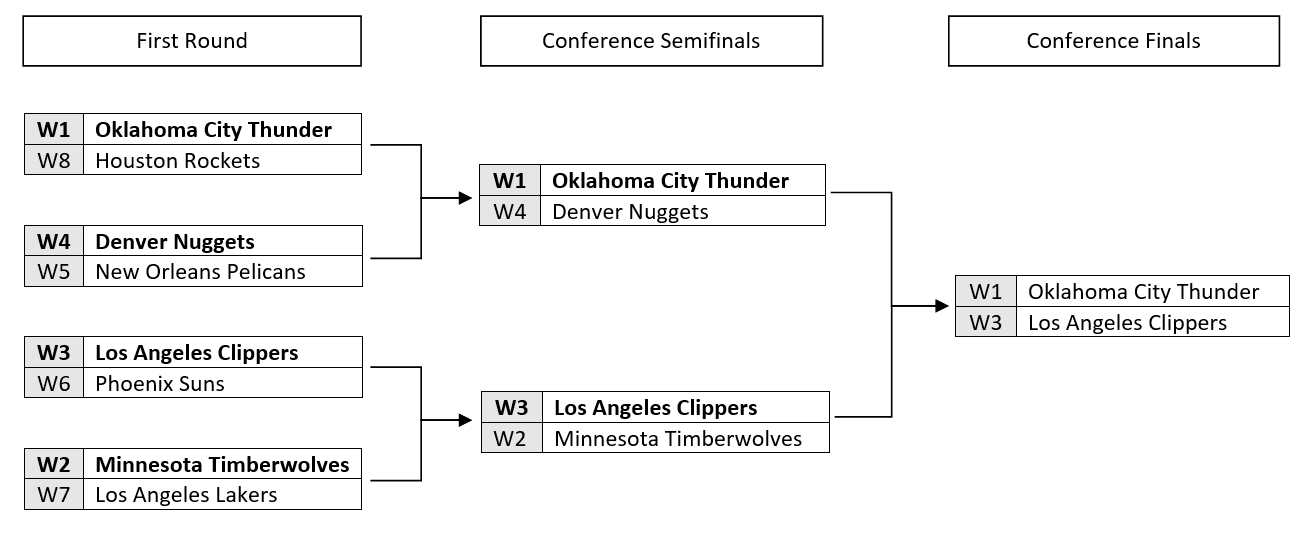

In [66]:
PlayoffSeriesSim("Oklahoma City Thunder", "Los Angeles Clippers", 1000)

Oklahoma City Thunder wins 100.0 % of best-of-7 series
Los Angeles Clippers wins 0.0 % of best-of-7 series

The average series score is 4 to 0 

Oklahoma City Thunder Average Score  114
Los Angeles Clippers Average Score  104


### NBA Finals

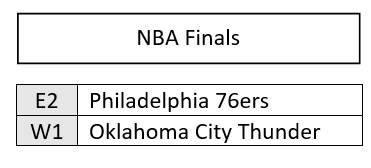

In [67]:
PlayoffSeriesSim("Philadelphia 76ers","Oklahoma City Thunder", 1000)

Philadelphia 76ers wins 100.0 % of best-of-7 series
Oklahoma City Thunder wins 0.0 % of best-of-7 series

The average series score is 4 to 0 

Philadelphia 76ers Average Score  114
Oklahoma City Thunder Average Score  104


## The Philadelphia 76ers win the 2023-2024 NBA title